# Association Rule:- Movies Data

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### Check out the Data

In [2]:
movies = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Association rules\my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies = movies.iloc[:,5:]

In [4]:
frequent_itemsets = apriori(movies, min_support=0.1, use_colnames=True)

In [5]:
rule = association_rules(frequent_itemsets, metric = 'lift', min_threshold=0.7)

Text(0.5, 1.0, 'confidence')

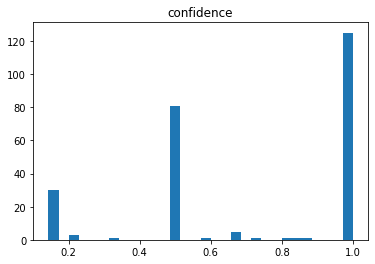

In [10]:
import matplotlib.pyplot as plt
rule.hist('confidence', grid = False , bins = 30)
plt.title('confidence')

Text(0.5, 1.0, 'Lift')

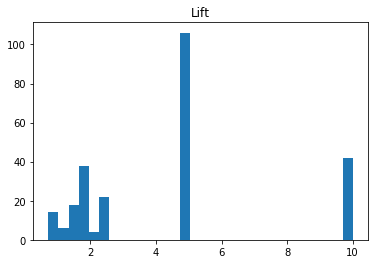

In [7]:
rule.hist('lift', grid = False, bins = 30)
plt.title('Lift')

In [8]:
rule.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
225,"(LOTR1, Sixth Sense, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
138,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
65,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
20,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
55,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [9]:
rule[rule.lift > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
